In [1]:
pip install networkx matplotlib


Note: you may need to restart the kernel to use updated packages.


/var/folders/yt/rs9xnj7d36zcptdbkf_0q0xm0000gn/T/ipykernel_44036/1373450915.py:38: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(mst, pos, width=edge_widths, edge_color=edge_colors)


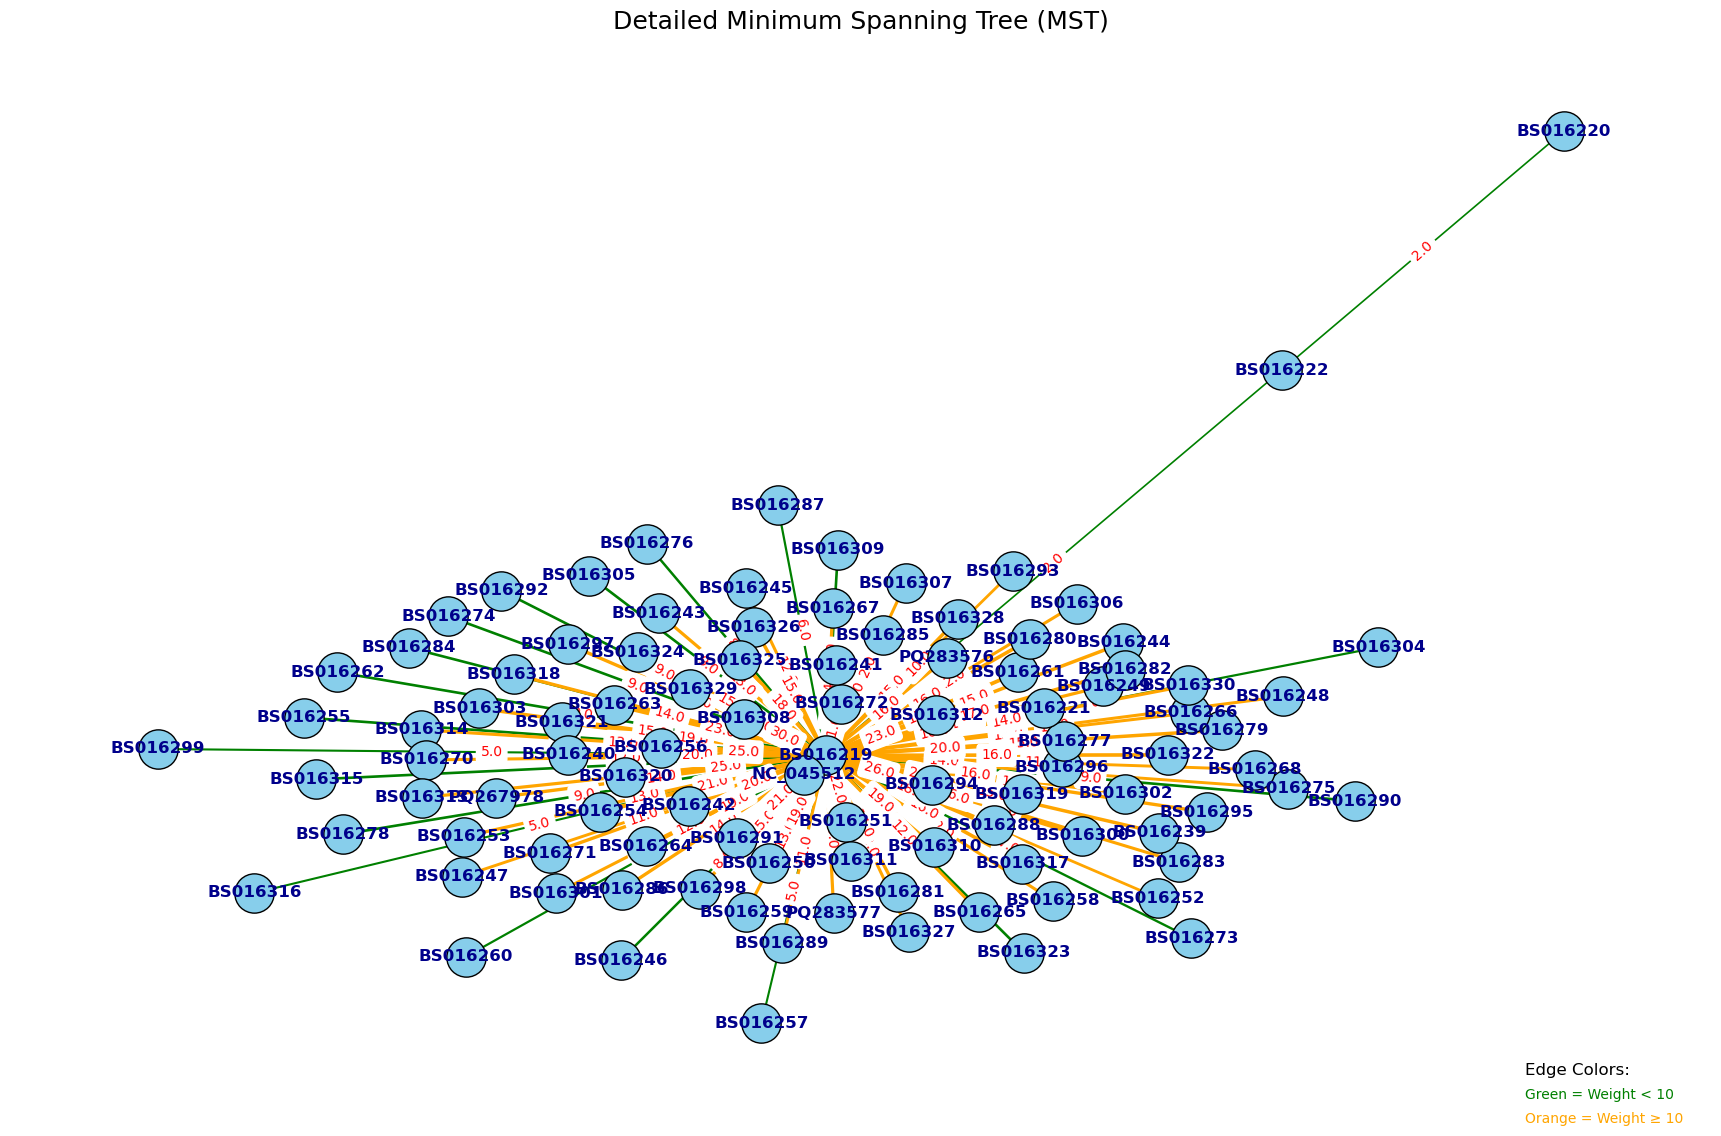

In [7]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/mohanavenkataphaneendrareddyalla/Desktop/Adv_comp_asspects_in_bioinfo/Homework_5/minimum_spanning_tree.csv')
G = nx.Graph()

for index, row in df.iterrows():
    G.add_edge(row['Node1'], row['Node2'], weight=row['Weight'])

mst = nx.minimum_spanning_tree(G)



plt.figure(figsize=(18, 12)) 
pos = nx.spring_layout(mst, seed=42)  


node_color = 'skyblue'
node_size = 800

edge_colors = ['green' if mst[u][v]['weight'] < 10 else 'orange' for u, v in mst.edges()]
edge_weights = [mst[u][v]['weight'] for u, v in mst.edges()]
edge_widths = [1 + (weight / 10) for weight in edge_weights]

nx.draw_networkx_nodes(mst, pos, node_size=node_size, node_color=node_color, edgecolors='black')


nx.draw_networkx_edges(mst, pos, width=edge_widths, edge_color=edge_colors)


nx.draw_networkx_labels(mst, pos, font_size=12, font_color='darkblue', font_weight='bold')

edge_labels = nx.get_edge_attributes(mst, 'weight')
nx.draw_networkx_edge_labels(mst, pos, edge_labels=edge_labels, font_size=10, font_color='red')

plt.text(0.85, 0.1, 'Edge Colors:', fontsize=12, transform=plt.gcf().transFigure)
plt.text(0.85, 0.08, 'Green = Weight < 10', fontsize=10, transform=plt.gcf().transFigure, color='green')
plt.text(0.85, 0.06, 'Orange = Weight ≥ 10', fontsize=10, transform=plt.gcf().transFigure, color='orange')

plt.title('Detailed Minimum Spanning Tree (MST)', fontsize=18)
plt.axis('off') 
plt.tight_layout()
plt.show()
